# **Clustering based on K-Means and EM Algorithm**

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [3]:
# Import some data to play with:

iris = datasets.load_iris()

X = pd.DataFrame(iris.data)
X.columns = ["Sepal_Length","Sepal_Width","Petal_Length","Petal_Width"]
Y = pd.DataFrame(iris.target)
Y.columns = ["Targets"]

# **K-Means Clustering**

Text(0, 0.5, 'Sepal Width')

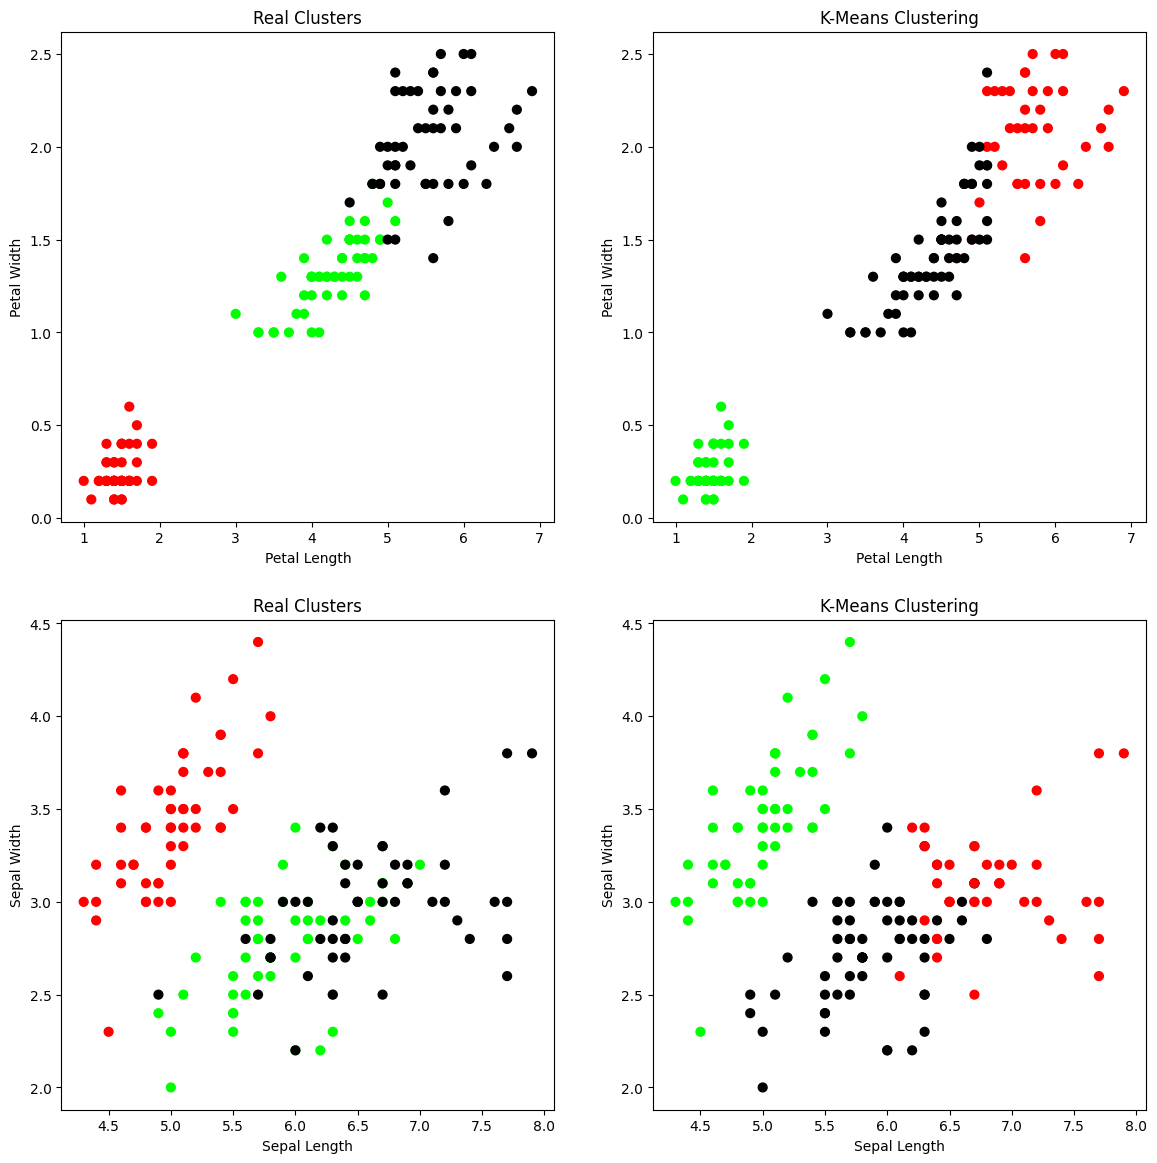

In [4]:
# Build the KMeans Model:

model = KMeans(n_clusters=3)
model.fit(X)

# Visualize the clustering results:

plt.figure(figsize=(14,14))
colormap = np.array(["red", "lime", "black"])

# Plot the original classifications using Petal features:
plt.subplot(2,2,1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[Y.Targets], s=40)
plt.title("Real Clusters")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

# Plot the model's classifications using Petal features:
plt.subplot(2,2,2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title("K-Means Clustering")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

# Plot the original classifications using Sepal features:
plt.subplot(2,2,3)
plt.scatter(X.Sepal_Length, X.Sepal_Width, c=colormap[Y.Targets], s=40)
plt.title("Real Clusters")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

# Plot the model's classifications using Sepal features:
plt.subplot(2,2,4)
plt.scatter(X.Sepal_Length, X.Sepal_Width, c=colormap[model.labels_], s=40)
plt.title("K-Means Clustering")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

# **General EM for GMM**

Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the K-Means.


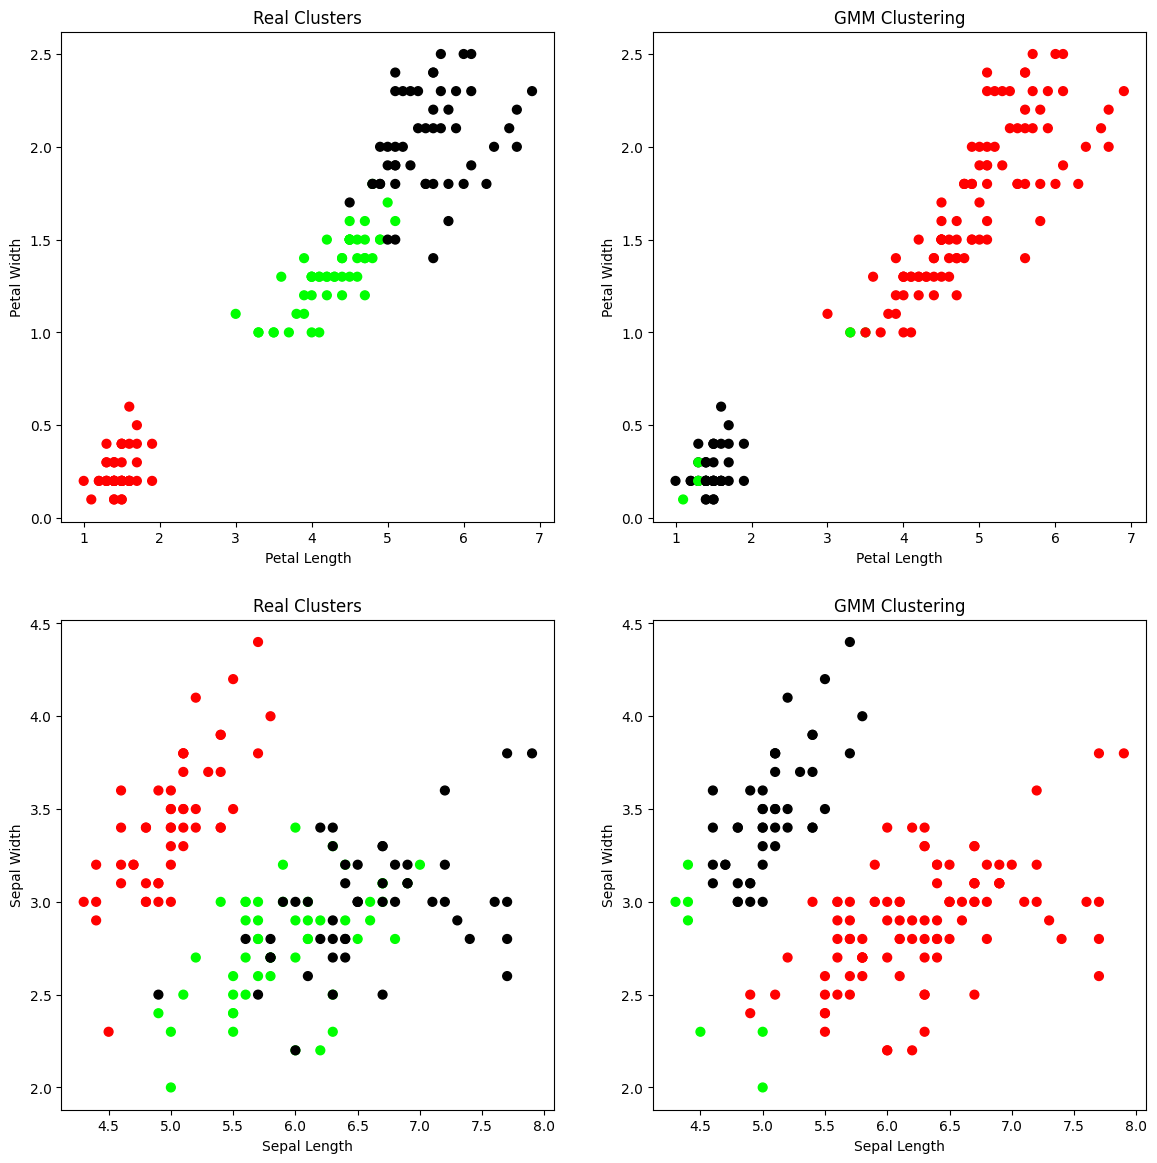

In [5]:
# Transform your data such that it's distribution will have a mean value of 0 and standard deviation of 1

scalar = preprocessing.StandardScaler()
scalar.fit(X)

xsa = scalar.transform(X)
xs = pd.DataFrame(xsa, columns=X.columns)

gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
gmm_y = gmm.predict(xs)

plt.figure(figsize=(14,14))
colormap = np.array(["red", "lime", "black"])

plt.subplot(2,2,1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[Y.Targets], s=40)
plt.title("Real Clusters")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

plt.subplot(2,2,2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[gmm_y], s=40)
plt.title("GMM Clustering")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

plt.subplot(2,2,3)
plt.scatter(X.Sepal_Length, X.Sepal_Width, c=colormap[Y.Targets], s=40)
plt.title("Real Clusters")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

plt.subplot(2,2,4)
plt.scatter(X.Sepal_Length, X.Sepal_Width, c=colormap[gmm_y], s=40)
plt.title("GMM Clustering")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

print("Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the K-Means.")